# Problem

- predict price for 2nd hand car sales

### critical thinking

- price is affected intuitively by _milage_, _year_, _EngineV_ and _brand_. 
    - Sports car (EngineV) are more expensive than economy
    - BMW (brand) is more expensive than toyoto
    - Old cars (year) are less expensive, except vintage cars
    


In [124]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

from sklearn.linear_model import LinearRegression

In [125]:
raw_data = pd.read_csv('dataset/car_sales.csv')

# data['view_map'] = data['view'].map({'No sea view':0, 'Sea view':1}) 

raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Pre-processing

### explore descriptive stats

- **missing values**
    - [x] count is different for all, means there is missing values  
    - [x] price (172 items) and EngineV (150 items) hvea missing values. **Total row=4345**. <5%, so we can delete, those rows
    - [x] the aim was predict price. so null price records can be deleted!
- **dummy variables**
    - [x] Brand, Body, Engine Type and Registration are categorical, and have less than 10 **unique** values, means they have potential as **dummy variables**. 
    - [ ] Model has 312 **unique**, hard to generate dummy variables. 
- **information value**
    - [ ] registration\`s **freq** is 3947, means nearly all values are Yes. So it is not useful. Drop it.
    - [ ] a lot of information of model _can be engineered_ from model, year and EngineV. So model is not useful. Drop it. we won\'t loose to much variability
- **outliers**
    - [x] Price 75% of values under 21k, but max value is 300k. That means there are some outliers in **price**. remove the %1 of them
    - [x] Mileage has some outliers
    - [x] EngineV has some outliers, and >6.5 is not a valid value also.
    - [x] Year has outliers b/w 1969 and 2003 !
    

In [126]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### determine variable of interest

In [127]:
data = raw_data.drop(['Model', 'Registration'], axis=1)


### missing values

In [128]:
data.isnull().sum()

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
dtype: int64

In [129]:
data = data.dropna(axis=0)

data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.00,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,2003
3,Audi,23000.0,crossover,240,4.20,Petrol,2007
4,Toyota,18300.0,crossover,120,2.00,Petrol,2011
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,2016
6,BMW,6100.0,sedan,438,2.00,Gas,1997
7,Audi,14200.0,vagon,200,2.70,Diesel,2006
8,Renault,10799.0,vagon,193,1.50,Diesel,2012
9,Volkswagen,1400.0,other,212,1.80,Gas,1999


### outliers

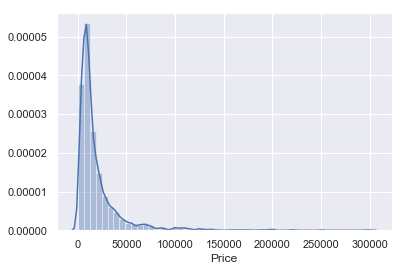

In [130]:
sns.distplot(data['Price'])


In [131]:
# eliminate %1 (%99 quanltile)
q = data['Price'].quantile(0.99)


data_1 = data[data['Price'] < q]

data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


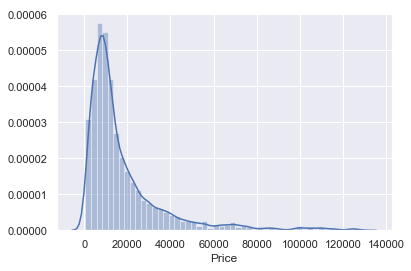

In [132]:
sns.distplot(data_1['Price'])

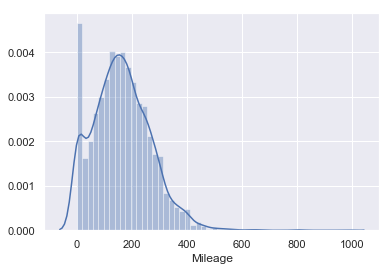

In [133]:
sns.distplot(data['Mileage'])

In [134]:
# eliminate %1 (%99 quanltile)
q = data['Mileage'].quantile(0.99)


data_2 = data_1[data_1['Mileage'] < q]

data_2.describe()

,Price,Mileage,EngineV,Year
count,3943.000000,3943.000000,3943.000000,3943.000000
mean,17936.780614,161.414659,2.747497,2006.393102
std,19009.750360,95.940408,4.981033,6.593870
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21417.500000,230.000000,3.000000,2011.000000
max,129222.000000,433.000000,99.990000,2016.000000


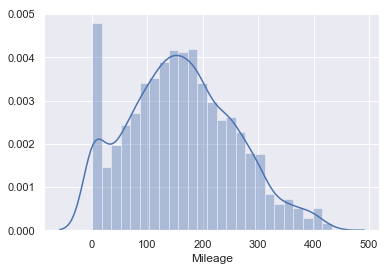

In [135]:
sns.distplot(data_2['Mileage'])

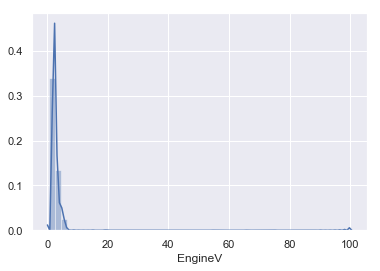

In [136]:
sns.distplot(data['EngineV'])

In [137]:
# eliminate %1 (%99 quanltile)
q = 6.5


data_3 = data_2[data_2['EngineV'] < q]

data_3.describe()

,Price,Mileage,EngineV,Year
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,17991.352031,161.209949,2.443304,2006.409184
std,19043.203478,95.980959,0.946242,6.593734
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,229.000000,3.000000,2012.000000
max,129222.000000,433.000000,6.300000,2016.000000


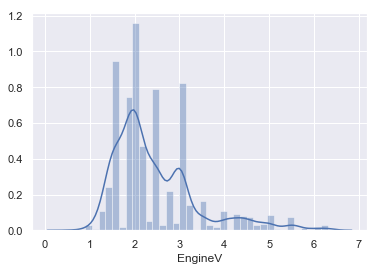

In [138]:
sns.distplot(data_3['EngineV'])

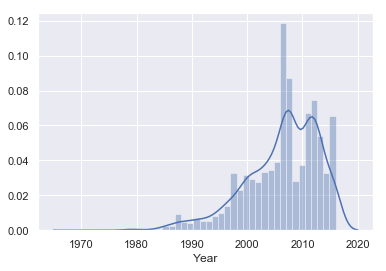

In [139]:
sns.distplot(data['Year'])

In [140]:
# get > %1
q = data['Year'].quantile(0.01)


data_4 = data_3[data_3['Year'] > q]

data_4.describe()

,Price,Mileage,EngineV,Year
count,3866.000000,3866.000000,3866.000000,3866.000000
mean,18197.480629,160.471547,2.450246,2006.713140
std,19087.396949,95.543697,0.949413,6.101235
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,433.000000,6.300000,2016.000000


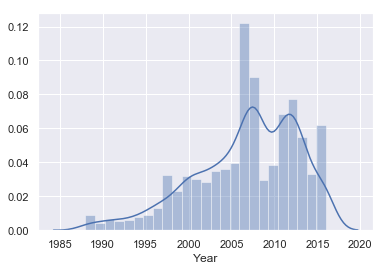

In [141]:
sns.distplot(data_4['Year'])

### end of cleansing

In [142]:
data_cleaned = data_4.reset_index(drop=True)

In [143]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,848,NaN,1466,NaN,NaN,1807,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,2012.000000


### checking OLS assumptions 

### visualization

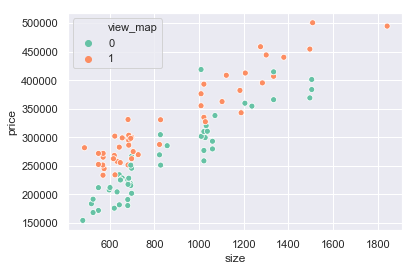

In [29]:
ax1 = sns.scatterplot(x='size', y='price', hue='view_map', palette='Set2', data=data)


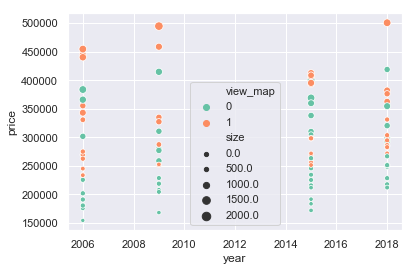

In [30]:
ax = sns.scatterplot(x='year', y='price', hue='view_map', size='size', palette='Set2', data=data)


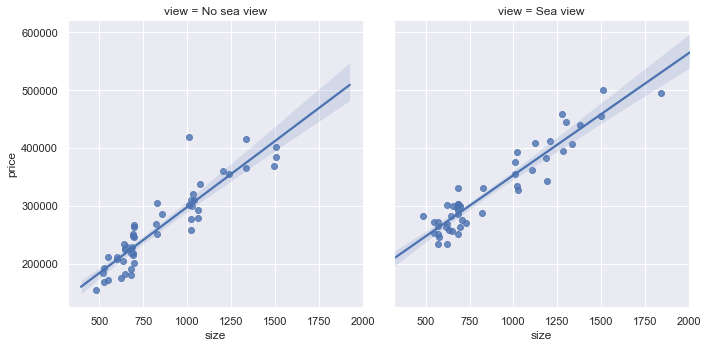

In [38]:
# sns.regplot(x="size", y="price", data=data);
sns.lmplot(x="size", y="price", col='view', data=data);


# regression

In [32]:
# we need OLS w/ constant **for lineer regression**
y = data['price']
x = data[['size', 'year','view_map']]

x.shape, y.shape

((100, 3), (100,))

### standardization - _feature scaling_

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

scaler.fit(x)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
x_scaled = scaler.transform(x)

x_scaled[0:3]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-0.70816415,  0.51006137, -0.98019606],
       [-0.66387316, -0.76509206, -0.98019606],
       [-1.23371919,  1.14763808,  1.02020406]])

### regression

In [36]:
# do regression w/ default settings, copy_X, fit_intercept, n_jobs, normalize

reg = LinearRegression()

reg.fit(x_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
# get regression results

summary = pd.DataFrame(data=[['Bias', reg.intercept_], 
                             ['size', reg.coef_[0]], 
                             ['year', reg.coef_[1]],
                             ['view', reg.coef_[2]],
                            ],
                      columns=['Features', 'Weights'])

summary

# print('r-squared:', reg.score(x_scaled, y),
#       '\nadjusted r-squared:', 1- (1-reg.score(x_scaled, y)) * (x_scaled.shape[0]-1) / (x_scaled.shape[0]-x_scaled.shape[1]-1))


,Features,Weights
0,Bias,292289.470160
1,size,66117.388569
2,year,12793.514096
3,view,28357.336730


# validations

In [47]:

test_data = pd.DataFrame(data=[[750,2009,0],
                               [750,2009,1],
                               [750,2010,0]], 
                         columns=['size', 'year', 'view'])

test_data

,size,year,view
0,750,2009,0
1,750,2009,1
2,750,2010,0


In [48]:
test_data['predicted_price'] = reg.predict(scaler.transform(test_data))

test_data

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,size,year,view,predicted_price
0,750,2009,0,231727.850292
1,750,2009,1,288453.870090
2,750,2010,0,234446.799181
